# POSTTEST8

### Import Library

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # Data Split
import tensorflow as tf
import tensorflow.keras.datasets as tfds

# Data Split
# Testing dan Training data
from sklearn.model_selection import train_test_split 

# Data Transforming
# Standarisasi
from sklearn.preprocessing import StandardScaler 

# Normalisasi
from sklearn.preprocessing import MinMaxScaler

# Data Cleaning
# Subtitusi nilai
from sklearn.impute import SimpleImputer 

# Data Encoding
# Onehot
from sklearn.preprocessing import OneHotEncoder

In [33]:
dataset_pes = pd.read_csv('deets-updated.csv')
dataset_pes.head()

,name,shirt_number,team_name,league,nationality,region,height,weight,age,foot,...,com_playing_style_incisive_run,com_playing_style_early_cross,com_playing_style_long_ball_expert,com_playing_style_long_ranger,height_over_185,age_u_24,age_25_29,age_30_plus,ball_color,rating_stars
0,NEYMAR,10,PSG,Ligue 1 Conforama,BRAZIL,South America,175,68,27,Right foot,...,1,0,0,0,0,0,1,0,black,5
1,M. NEUER,1,FC BAYERN MÜNCHEN,Other European Leagues,GERMANY,Europe,193,92,33,Right foot,...,0,0,0,0,1,0,0,1,black,5
2,EDU CAMPABADAL,22,LUGO RB,Spanish 2nd Division,SPAIN,Europe,178,77,26,Right foot,...,0,0,0,0,0,0,1,0,white,1
3,FRAN CRUZ,5,EXTREMADURA AR,Spanish 2nd Division,SPAIN,Europe,184,73,28,Right foot,...,0,0,0,0,0,0,1,0,white,1
4,DANI PINILLOS,23,BARNSLEY R,English 2nd Division,SPAIN,Europe,183,74,27,Left foot,...,0,1,1,0,0,0,1,0,white,1


In [34]:

# bikin alat
imputer_mean = SimpleImputer(strategy = 'mean')

#mean
dataset_pes['LWF'] = imputer_mean.fit_transform(dataset_pes[['LWF']])
dataset_pes['SS'] = imputer_mean.fit_transform(dataset_pes[['SS']])
dataset_pes['CF'] = imputer_mean.fit_transform(dataset_pes[['CF']])
dataset_pes['RWF'] = imputer_mean.fit_transform(dataset_pes[['RWF']])

In [35]:
dataset_pes.drop_duplicates(inplace=True)

dataset_pes.duplicated().sum()

0

In [36]:
data = dataset_pes[['height','weight','age','overall_rating']]
label = dataset_pes['rating_stars']

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.3)

In [37]:
#Normalisasi
scaler = MinMaxScaler()

normalize_dataset = scaler.fit_transform(dataset_pes[['height', 'weight', 'age','overall_rating']])

normalize_dataset = pd.DataFrame(normalize_dataset)
normalize_dataset.rename(columns={ 0 :'height', 1 : 'weight', 2 : 'age', 3 : 'overall_rating'}, inplace=True)

normalize_dataset.head(5)

,height,weight,age,overall_rating
0,0.457627,0.338235,0.428571,0.954545
1,0.762712,0.691176,0.642857,0.886364
2,0.508475,0.470588,0.392857,0.409091
3,0.610169,0.411765,0.464286,0.363636
4,0.593220,0.426471,0.428571,0.363636


In [38]:
#Standarisasi
dataset_pes.drop('rating_stars', axis=1, inplace=True)

standart_std = StandardScaler()

scaled_data = standart_std.fit_transform(dataset_pes[['height', 'weight', 'age', 'overall_rating']])
scaled_data = pd.DataFrame(scaled_data)
scaled_data.rename(columns={ 0 :'height', 1 : 'weight', 2 : 'age', 3 : 'overall_rating'}, inplace=True)

scaled_data_pes = standart_std.fit_transform(dataset_pes[['height', 'weight', 'age', 'overall_rating']])
scaled_data_pes = pd.DataFrame(scaled_data_pes)
scaled_data_pes.rename(columns={ 0 :'height', 1 : 'weight', 2 : 'age', 3 : 'overall_rating'}, inplace=True)

print('Dataset sebelum scalling:',  # SEBELUM
      dataset_pes.drop('team_name', axis=1).head(6),'\n'
      f'Nilai standar deviasi:\n{np.std(scaled_data_pes)}',
      sep='\n', end='\n\n')

print('Dataset setelah scalling:',  # SESUDAH
      scaled_data[:6],
      f'Nilai standar deviasi: {np.std(scaled_data)}',
      sep='\n')

Dataset sebelum scalling:
             name shirt_number                  league nationality  \
0          NEYMAR           10       Ligue 1 Conforama      BRAZIL   
1        M. NEUER            1  Other European Leagues     GERMANY   
2  EDU CAMPABADAL           22    Spanish 2nd Division       SPAIN   
3       FRAN CRUZ            5    Spanish 2nd Division       SPAIN   
4   DANI PINILLOS           23    English 2nd Division       SPAIN   
5       N. OBIORA            4                Liga NOS     NIGERIA   

          region  height  weight  age        foot condition  ...  \
0  South America     175      68   27  Right foot         C  ...   
1         Europe     193      92   33  Right foot         C  ...   
2         Europe     178      77   26  Right foot         C  ...   
3         Europe     184      73   28  Right foot         C  ...   
4         Europe     183      74   27   Left foot         C  ...   
5         Africa     183      77   28   Left foot         C  ...   

  com_

In [39]:
data.shape

(15031, 4)

In [40]:
data.corr()

,height,weight,age,overall_rating
height,1.000000,0.749935,0.123528,0.120263
weight,0.749935,1.000000,0.215062,0.168111
age,0.123528,0.215062,1.000000,0.473702
overall_rating,0.120263,0.168111,0.473702,1.000000


In [41]:
data.isna().sum()

height            0
weight            0
age               0
overall_rating    0
dtype: int64

In [42]:
print(f'the length of data train is {len(data_train)}',
      f'the length of label train is {len(label_train)}',
      f'the length of data test is {len(data_test)}',
      f'the length of label test is {len(label_test)}',
      sep='\n')

the length of data train is 10521
the length of label train is 10521
the length of data test is 4510
the length of label test is 4510


In [43]:
data_train.shape

(10521, 4)

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu',input_dim = 10521),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [50]:
#Ringkasan
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile model
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(
    data_train,
    label_train,
    epochs=2,
    validation_data=(data_test, label_test)
)

Epoch 1/2
329/329 [==============================] - 0s 1ms/step - loss: -62704604.0000 - accuracy: 0.5651 - val_loss: -66973504.0000 - val_accuracy: 0.5639
Epoch 2/2
329/329 [==============================] - 0s 1ms/step - loss: -68898696.0000 - accuracy: 0.5651 - val_loss: -73470248.0000 - val_accuracy: 0.5639


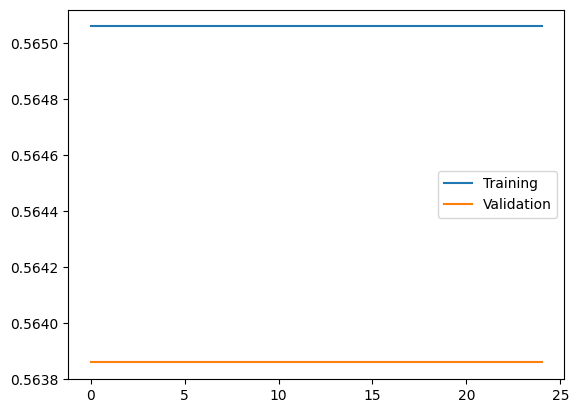

In [53]:
# Grafik learning rate
grafik = range(len(history.history['accuracy']))
plt.plot(grafik, history.history['accuracy'], label='Training')
plt.plot(grafik, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()